# **CDR Project**: Variations in Subscribers Presence
---
<ins>Contact details: </ins>  
Romain Goldenberg (MSc, PhD) - Data Trainer and Analyst  
romain.goldenberg@flowminder.org - www.flowminder.org  
This work © 2022 by Flowminder is licensed under CC BY-NC-ND 4.0. To view a copy of this licence, visit http://creativecommons.org/licenses/by-nc-nd/4.0/

---
If you want to learn more about the creation of aggregates and mobility indicators, go to [Flowminder COVID-19 ressources](https://covid19.flowminder.org/cdr-aggregates/cdr-aggregates-list-and-methods) or [Flowminder COVID-19 GitHub](https://github.com/Flowminder/COVID-19).

---

## 1. Description

You are provided with a raw dataset, which contains a large subset of a larger CDR data records. This is of course sensitive data, as it contains commercial information from a mobile network operator (MNO) as well as individual, private, information. Being trusted by your clients, you received this dataset to perform a first data exploratory phase, as they want to understand different properties and characteristics of the data, as well as calculate some initial aggregates. Before starting this project, you understand from your clients that the cdr data you received covers a period of time with an event which significantly affected mobility in the country.  
For this project, you will first need to explore, clean and re-structure the datasets. Then, when you have a good understanding of the (cleaned) data, produce some aggregates and a final mobility indicator.

---
## 2. Getting started
The complete dataset includes:
`cdr_subset.csv`, a (relatively) large subset of CDR data records
`cell_towers.geojson`, a dataset containing information on the cellular towers and their spatial location
The folder `NPL_admin_boundaries`, which contains `NPL_admin_0.geojson`, `NPL_admin_1.geojson` and `NPL_admin_2.geojson`, administrative boundaries (with different spatial resolutions) for the country of Nepal.


---
# Part 1 - Data exploration and preparation
To get started, we will first need to import the necessary Python libraries, set some data and folder paths, and finally import the 3 datasets.

# Libraries

In [1]:
# from pathlib import Path

# import contextily as cx  # Optional
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Folders paths

In [2]:
# # Current path of the data (to modify to your own filepath)
# current_path = Path.cwd()
# parent_path = current_path.parent

# Data loading

In [3]:
# Load the datasets
cell_towers = gpd.read_file("cell_towers.geojson")

admin_0 = gpd.read_file("NPL_admin_0.geojson")
admin_1 = gpd.read_file("NPL_admin_1.geojson")
admin_2 = gpd.read_file("NPL_admin_2.geojson")
cdr= pd.read_csv("cdr_subset.csv")
cdr.head()

,Unnamed: 0,id,outgoing,datetime,duration,network,msisdn,msisdn_counterpart,location_id,imsi,imei,tac,operator_code,country_code,call_date
0,0,b8963c37-1699-4ee0-8d80-17e79ac4249c,t,2016-01-01 10:45:24.158813+00:00,1646,NaN,6599b02ffe5164b3f0bc63808b63414a,56622a73e1f5317cbcac7b773e053b95,95cc6baf49adb6bfe8541827b52f4606,255f33890339291baae8ae4d252da76d,ab2eb3bd2db3106312819a89eb9e5dec,17,NaN,NaN,2016-01-01
1,1,28934c1f-825a-4120-8885-818c6bb6b5a7,t,2016-01-01 04:20:50.782825+00:00,872,NaN,271d0ff97f5db99055a51271ea2da91c,1499602a771e74f7ba13eccdb7ab414e,1a09a6aff726f26f92bc8cd18c02dcef,458e7ffc512917dfc631b8d0d6fdad03,4366c901ca19cef095dc8a0773216c09,9,NaN,NaN,2016-01-01
2,2,02160a87-ad5f-4f69-b2d2-6593b1f8e50f,t,2016-01-01 05:28:17.746989+00:00,1486,NaN,9b636b3b9f0d4e8c88c195eaadb9e05e,db9813840ff3f21486e36acb4cea6814,f09543b192e77c6b293910fa58f63e9d,ccb870900822acc2f9d09b14cd460cf7,19d9c2f4744b7e91746e4e758f14f24f,13,NaN,NaN,2016-01-01
3,3,93e9ef42-adad-49e5-a83a-c4d907c1849c,t,2016-01-01 02:17:37.721142+00:00,1554,NaN,9c5c42f2685e73a0418017145b5c9937,ecf35b0006aff9707ce64480010a0954,d690bc731cb836090488894e497aecd9,d7ec6e06d5d41589d520ee4c09837c82,14edb480a90e91b9dd2c05c419c0d2be,10,NaN,NaN,2016-01-01
4,4,aea156be-61b9-4035-b0ac-a2e75fd9a601,t,2016-01-01 23:05:04.097218+00:00,2281,NaN,fabc01ef9b0a3107c1073b8b1c96aed4,ecf35b0006aff9707ce64480010a0954,2f178be611764586663f77e9eed75cea,24e3ca50ca26aaea99b88bc7d6039cf3,3b7c61584ebf3ca5cf46794be0d609db,12,NaN,NaN,2016-01-01


In [4]:
cdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12400 non-null  int64  
 1   id                  12400 non-null  object 
 2   outgoing            12400 non-null  object 
 3   datetime            12400 non-null  object 
 4   duration            12400 non-null  int64  
 5   network             0 non-null      float64
 6   msisdn              12400 non-null  object 
 7   msisdn_counterpart  12400 non-null  object 
 8   location_id         12400 non-null  object 
 9   imsi                12400 non-null  object 
 10  imei                12400 non-null  object 
 11  tac                 12400 non-null  int64  
 12  operator_code       0 non-null      float64
 13  country_code        0 non-null      float64
 14  call_date           12400 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.4+

In [5]:
# Convert the column called 'datetime' to the data format datetime
cdr.datetime = pd.to_datetime(cdr.datetime)

# Add a date column (for convenience)
cdr["call_date"] = cdr.datetime.dt.date.astype("datetime64")

In [6]:
cdr

,Unnamed: 0,id,outgoing,datetime,duration,network,msisdn,msisdn_counterpart,location_id,imsi,imei,tac,operator_code,country_code,call_date
0,0,b8963c37-1699-4ee0-8d80-17e79ac4249c,t,2016-01-01 10:45:24.158813+00:00,1646,NaN,6599b02ffe5164b3f0bc63808b63414a,56622a73e1f5317cbcac7b773e053b95,95cc6baf49adb6bfe8541827b52f4606,255f33890339291baae8ae4d252da76d,ab2eb3bd2db3106312819a89eb9e5dec,17,NaN,NaN,2016-01-01
1,1,28934c1f-825a-4120-8885-818c6bb6b5a7,t,2016-01-01 04:20:50.782825+00:00,872,NaN,271d0ff97f5db99055a51271ea2da91c,1499602a771e74f7ba13eccdb7ab414e,1a09a6aff726f26f92bc8cd18c02dcef,458e7ffc512917dfc631b8d0d6fdad03,4366c901ca19cef095dc8a0773216c09,9,NaN,NaN,2016-01-01
2,2,02160a87-ad5f-4f69-b2d2-6593b1f8e50f,t,2016-01-01 05:28:17.746989+00:00,1486,NaN,9b636b3b9f0d4e8c88c195eaadb9e05e,db9813840ff3f21486e36acb4cea6814,f09543b192e77c6b293910fa58f63e9d,ccb870900822acc2f9d09b14cd460cf7,19d9c2f4744b7e91746e4e758f14f24f,13,NaN,NaN,2016-01-01
3,3,93e9ef42-adad-49e5-a83a-c4d907c1849c,t,2016-01-01 02:17:37.721142+00:00,1554,NaN,9c5c42f2685e73a0418017145b5c9937,ecf35b0006aff9707ce64480010a0954,d690bc731cb836090488894e497aecd9,d7ec6e06d5d41589d520ee4c09837c82,14edb480a90e91b9dd2c05c419c0d2be,10,NaN,NaN,2016-01-01
4,4,aea156be-61b9-4035-b0ac-a2e75fd9a601,t,2016-01-01 23:05:04.097218+00:00,2281,NaN,fabc01ef9b0a3107c1073b8b1c96aed4,ecf35b0006aff9707ce64480010a0954,2f178be611764586663f77e9eed75cea,24e3ca50ca26aaea99b88bc7d6039cf3,3b7c61584ebf3ca5cf46794be0d609db,12,NaN,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,12395,cd62485d-8c3f-423d-98f9-3ef7d634057f,f,2016-01-31 15:26:06.004810+00:00,1271,NaN,f85d6a426b1fcf2a39fd431169316b95,2ca4acaefffc1e5ccb5c6ce484f2ab40,fcd019e3bfcc7ba320573ea474e04cfd,02d01ce8bd8a166449701acf057127e8,8b45cd285ae50f9b64674d9175166ddb,13,NaN,NaN,2016-01-31
12396,12396,24ca7b51-bf11-4f35-a48d-87adb711a3e9,f,2016-01-31 22:41:47.660232+00:00,2038,NaN,4ef8709f3c0f043815a7ad1b9f46984c,60dc3bd5870b1c231929a3d9272550d7,5304941baf455d6b545db3815ef604dc,c06391cb02b3fd66ae69c282269bb5d2,8f65a2828a6bf414e5c6e150101fe0f5,19,NaN,NaN,2016-01-31
12397,12397,b1dcaea5-6ca5-4cc2-8792-aaf1da4a4c56,f,2016-01-31 10:36:28.693385+00:00,2582,NaN,83a89ab577145247dba4cc15291deb34,8cc5dcae76bc7e836aceeb7fa081eb7d,a4a46fd1d2d518b890211d6fb00aca93,27d07ea9164eaf6bbeb62df516f65227,a762d8c56c6dfd54a36b064eadc71d70,12,NaN,NaN,2016-01-31
12398,12398,3ac329f2-6074-4f0a-87dd-0c25caba2fd1,f,2016-01-31 05:47:31.854992+00:00,748,NaN,db15b008d5651f9b1deb5cc3aa3956be,67c8924931b4a84515bca92536a59f2c,05dea0f19026158ac28267bcbb6a806d,536e578341f8ce2857f3bc5c3acda7d6,b2fa9765c3b1ac38b29a5b8619fc5ff6,2,NaN,NaN,2016-01-31


### 1. What is the structure of the cdr and cell_towers datasets?

In [7]:
display(cdr.sort_values(by="id").head(6))
cdr.info()

,Unnamed: 0,id,outgoing,datetime,duration,network,msisdn,msisdn_counterpart,location_id,imsi,imei,tac,operator_code,country_code,call_date
11987,11987,001a0b1f-77b4-43a6-b127-0142a717560e,f,2016-01-30 21:52:29.432035+00:00,2265,NaN,ac257f6377cc98cbdc95fedcae5955ce,56c4e98612d19b2843620f2462b12c27,db70b323d536ee50dd27ae50342424c9,d74391254ecda636eb9dd9584b9d9b42,b8885af6406e1b5a48a1e201a823466c,9,NaN,NaN,2016-01-30
11787,11787,001a0b1f-77b4-43a6-b127-0142a717560e,t,2016-01-30 21:52:29.432035+00:00,2265,NaN,56c4e98612d19b2843620f2462b12c27,ac257f6377cc98cbdc95fedcae5955ce,d690bc731cb836090488894e497aecd9,afb077223f47067adc7ed85a9a86ac61,c0d371ca6fbe6027dbba0e064feb822c,13,NaN,NaN,2016-01-30
218,218,002af082-41c0-4648-a6ef-dd09d1ed8503,f,2016-01-01 21:03:28.650439+00:00,1089,NaN,c1300678466c950e8db1778890df653d,dfe8ee27b1a77bbc29437a1fb558bb92,0d0941512dfa5c2a8c7a7a3b8e23c6d0,bfd75395cabda1812b42fda0e3836b85,ac98ad490a7eddc7ff4c9409de0c60fa,15,NaN,NaN,2016-01-01
18,18,002af082-41c0-4648-a6ef-dd09d1ed8503,t,2016-01-01 21:03:28.650439+00:00,1089,NaN,dfe8ee27b1a77bbc29437a1fb558bb92,c1300678466c950e8db1778890df653d,ae247cf9d07d5634a4044a03f2b262d7,9dd25216e09ac41c0799485dd89ae4cb,5f09bfd50871414ab39170e89e18254c,14,NaN,NaN,2016-01-01
2447,2447,003299ee-6930-4fd8-ad79-1f4a0f8373c7,t,2016-01-06 22:08:55.590121+00:00,24,NaN,96ec8f223f646af2d77a0c2238cac0ff,8fdb632a275838ba6c0f39d7352cbd57,0367633471fe38c64e948661405ef317,02615ac164ee1442275bc45eca2422e3,5b4bab9b107f9e2c944f1bd03b66d648,16,NaN,NaN,2016-01-06
2647,2647,003299ee-6930-4fd8-ad79-1f4a0f8373c7,f,2016-01-06 22:08:55.590121+00:00,24,NaN,8fdb632a275838ba6c0f39d7352cbd57,96ec8f223f646af2d77a0c2238cac0ff,b330457e8f51377f36ec9b15afe1b720,fbec4155ecf1097426120f66badf47cd,5404367ac1d6cc279ae15e3fc72d556b,1,NaN,NaN,2016-01-06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Unnamed: 0          12400 non-null  int64              
 1   id                  12400 non-null  object             
 2   outgoing            12400 non-null  object             
 3   datetime            12400 non-null  datetime64[ns, UTC]
 4   duration            12400 non-null  int64              
 5   network             0 non-null      float64            
 6   msisdn              12400 non-null  object             
 7   msisdn_counterpart  12400 non-null  object             
 8   location_id         12400 non-null  object             
 9   imsi                12400 non-null  object             
 10  imei                12400 non-null  object             
 11  tac                 12400 non-null  int64              
 12  operator_code       0 non-null  

In [8]:
display(cdr.sort_values(by="msisdn").head(10))
cdr.info()

,Unnamed: 0,id,outgoing,datetime,duration,network,msisdn,msisdn_counterpart,location_id,imsi,imei,tac,operator_code,country_code,call_date
8793,8793,11200918-26d6-4068-9dca-1b7c21bd5265,f,2016-01-20 16:53:22.950673+00:00,2323,NaN,010848f9298ef06a00a980a17ceef816,dfb98388863e5638d6b6e96dc790a7de,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-20
5992,5992,5344c2ae-131b-4260-a5e2-c1ac642c59a1,f,2016-01-14 17:28:47.920411+00:00,846,NaN,010848f9298ef06a00a980a17ceef816,30ed08ba3ab18c21ef2a9ce8444bdc4e,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-14
4161,4161,22633e6e-0c8c-460d-8a6d-23ea300ca4b6,t,2016-01-11 17:56:34.088754+00:00,1450,NaN,010848f9298ef06a00a980a17ceef816,ca97bd4addf4a1924542517004a71db5,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-11
4892,4892,ba6d4f13-8ef2-462c-906e-1c54ab892c68,t,2016-01-13 12:40:53.309122+00:00,2016,NaN,010848f9298ef06a00a980a17ceef816,30ed08ba3ab18c21ef2a9ce8444bdc4e,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-13
7756,7756,0de88230-d7fb-4ca2-b230-38a828f14fdf,t,2016-01-21 16:00:21.324126+00:00,1926,NaN,010848f9298ef06a00a980a17ceef816,ca97bd4addf4a1924542517004a71db5,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-21
8092,8092,9a5bc656-86c7-47d8-9058-d0db5cc5cb40,t,2016-01-22 11:07:50.490049+00:00,859,NaN,010848f9298ef06a00a980a17ceef816,30ed08ba3ab18c21ef2a9ce8444bdc4e,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-22
7187,7187,46fcfce6-e78c-4861-80f5-e9c620b8e7ee,f,2016-01-18 11:45:39.353432+00:00,99,NaN,010848f9298ef06a00a980a17ceef816,6f5c3d6136d38f439b59a9eb83241e41,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-18
4103,4103,026a57fc-716a-4cfb-8af6-75dbfbf3871a,t,2016-01-11 02:02:43.525643+00:00,612,NaN,010848f9298ef06a00a980a17ceef816,30ed08ba3ab18c21ef2a9ce8444bdc4e,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-11
92,92,9be95d01-35c8-4702-86eb-54ca340c2e2a,t,2016-01-01 20:53:03.609418+00:00,449,NaN,010848f9298ef06a00a980a17ceef816,30ed08ba3ab18c21ef2a9ce8444bdc4e,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-01
3994,3994,7a3e823e-e45e-4c76-ad3e-99217d642b26,f,2016-01-10 10:53:34.530195+00:00,1955,NaN,010848f9298ef06a00a980a17ceef816,fb3b762f53bfcc32dcd3f4139e301786,470ed0c2dcceb4e6843f94549bcac0c8,bf9e80bd64cb0920e3931bbe2e1191af,0d115aac2704d529142d2b386d97a4b6,2,NaN,NaN,2016-01-10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Unnamed: 0          12400 non-null  int64              
 1   id                  12400 non-null  object             
 2   outgoing            12400 non-null  object             
 3   datetime            12400 non-null  datetime64[ns, UTC]
 4   duration            12400 non-null  int64              
 5   network             0 non-null      float64            
 6   msisdn              12400 non-null  object             
 7   msisdn_counterpart  12400 non-null  object             
 8   location_id         12400 non-null  object             
 9   imsi                12400 non-null  object             
 10  imei                12400 non-null  object             
 11  tac                 12400 non-null  int64              
 12  operator_code       0 non-null  

In [9]:
display(cell_towers.head(2))
cell_towers.info()

,cell_id,id,version,site_id,name,type,msc,bsc_rnc,antenna_type,status,...,azimuth,transmitter,max_range,min_range,electrical_tilt,mechanical_downtilt,date_of_first_service,date_of_last_service,geom_polygon,geometry
0,1,9cfd70df4cd3da2d480b9f00bed208f6,0,2f2d0c39d9e62ef05091e46c21eb31ea,None,None,None,None,None,None,...,None,None,None,None,None,None,2015-06-05,None,None,POINT (85.48658 27.65796)
1,2,a840dbe701f5eb74547551d1d642677e,0,7fe015df18e35c4f41165e3424165431,None,None,None,None,None,None,...,None,None,None,None,None,None,2015-04-09,None,None,POINT (85.40793 27.69940)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   cell_id                200 non-null    int64   
 1   id                     200 non-null    object  
 2   version                200 non-null    int64   
 3   site_id                200 non-null    object  
 4   name                   0 non-null      object  
 5   type                   0 non-null      object  
 6   msc                    0 non-null      object  
 7   bsc_rnc                0 non-null      object  
 8   antenna_type           0 non-null      object  
 9   status                 0 non-null      object  
 10  lac                    0 non-null      object  
 11  height                 0 non-null      object  
 12  azimuth                0 non-null      object  
 13  transmitter            0 non-null      object  
 14  max_range              0 non-null 

### 2. From the cell_towers dataset, what is the number of (unique) cell towers?

In [10]:
cell_towers.cell_id.nunique()

200

### 3.a. From the cdr dataset, what is the number of recorded events?

In [11]:
cdr.id.count()

12400

In [12]:
event_count = cdr.id.nunique()
event_count

6200

Both sides of an event (sender and receiver) are recorded in the dataset, meaning that each same event is recorded twice in the dataset, from the receiver side and from the sender side (in other words, each unique call id exists twice in the dataset: once for the receiver, and once for the sender).
The reason why we have access to this information on both sides, and for each event, is that each subscriber (sender or receiver) in the dataset is a subscriber of the MNO from which we got the data (assuming we only received data from a unique MNO).

### 3.b. From the cdr dataset, what time period does the dataset cover (i.e. start date and end date)?

In [13]:
min_d = cdr.datetime.dt.date.astype("datetime64").min()

In [14]:
max_d = cdr.datetime.dt.date.astype("datetime64").max()

In [15]:
days_count = abs((max_d - min_d).days + 1)

In [16]:
print(
    f'From {min_d.strftime("%Y-%m-%d")} to {max_d.strftime("%Y-%m-%d")}, {days_count} days.'
)

From 2016-01-01 to 2016-01-31, 31 days.


### 3.c. From the cdr dataset, how many (unique) subscribers are in this dataset? Given this, you can estimate the average number of events per subscribers, per day.

In [17]:
subscriber_count = cdr.msisdn.nunique()
subscriber_count

499

In [18]:
avg = event_count / (subscriber_count * days_count)
print(f"Approximately {round(avg,2)} events, per subscriber per day.")

Approximately 0.4 events, per subscriber per day.


### 4. From the cdr dataset, calculate the count of (unique) events, for each subscriber. You can plot an histogram of the resulting data to see its distribution.

In [19]:
dist = cdr.groupby(["msisdn"])["id"].nunique()
dist

msisdn
010848f9298ef06a00a980a17ceef816    28
01496ab1eac1489401b73899113c2b64    54
02118dabd3f9441498cd1ea5999058b7    12
036a72bf954f29dd6cb17928c516a768    14
04882d691722a571fb0c77786534a751    15
                                    ..
fc7a7ccf70960b11ba58e073c5775769    25
fcebfc2c98a1ddef78877e665ea53fd2    20
fd7d9e7d4aaeb684b510e4a51832c879    35
fe15bd1b293f071cc8f5b4d0111aa998    22
feb6b224111b6ddda006aeef8610810a    24
Name: id, Length: 499, dtype: int64

<Axes: >

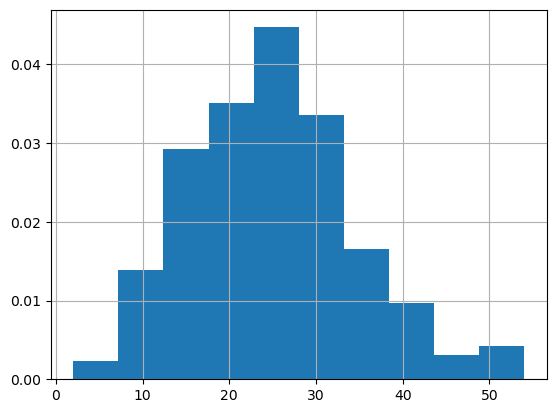

In [20]:
dist.hist(bins=10, density=True)

### 5. From the cdr dataset, calculate the count of days with events (in other word, each day with at least one event), for each subscriber. You can plot an histogram of the resulting data to see its distribution.

In [21]:
dist = cdr.groupby(["msisdn"])["call_date"].nunique()
dist

msisdn
010848f9298ef06a00a980a17ceef816    20
01496ab1eac1489401b73899113c2b64    27
02118dabd3f9441498cd1ea5999058b7    10
036a72bf954f29dd6cb17928c516a768    12
04882d691722a571fb0c77786534a751    12
                                    ..
fc7a7ccf70960b11ba58e073c5775769    19
fcebfc2c98a1ddef78877e665ea53fd2    13
fd7d9e7d4aaeb684b510e4a51832c879    25
fe15bd1b293f071cc8f5b4d0111aa998    17
feb6b224111b6ddda006aeef8610810a    14
Name: call_date, Length: 499, dtype: int64

<Axes: >

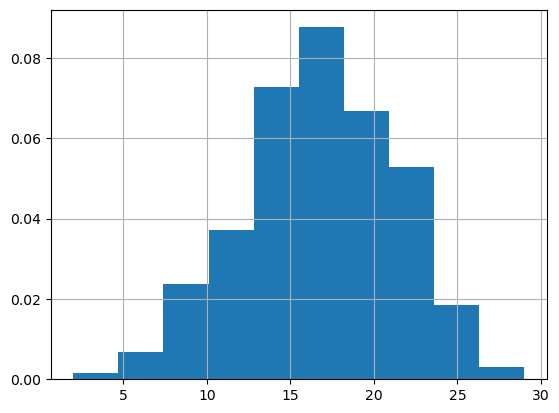

In [22]:
dist.hist(bins=10, density=True)

### 6. Shifting focus to the data from the “active subscribers”

In [23]:
new_cdr = cdr.groupby("msisdn").filter(lambda r: r.call_date.nunique() >= 14)

In [24]:
new_cdr

,Unnamed: 0,id,outgoing,datetime,duration,network,msisdn,msisdn_counterpart,location_id,imsi,imei,tac,operator_code,country_code,call_date
0,0,b8963c37-1699-4ee0-8d80-17e79ac4249c,t,2016-01-01 10:45:24.158813+00:00,1646,NaN,6599b02ffe5164b3f0bc63808b63414a,56622a73e1f5317cbcac7b773e053b95,95cc6baf49adb6bfe8541827b52f4606,255f33890339291baae8ae4d252da76d,ab2eb3bd2db3106312819a89eb9e5dec,17,NaN,NaN,2016-01-01
1,1,28934c1f-825a-4120-8885-818c6bb6b5a7,t,2016-01-01 04:20:50.782825+00:00,872,NaN,271d0ff97f5db99055a51271ea2da91c,1499602a771e74f7ba13eccdb7ab414e,1a09a6aff726f26f92bc8cd18c02dcef,458e7ffc512917dfc631b8d0d6fdad03,4366c901ca19cef095dc8a0773216c09,9,NaN,NaN,2016-01-01
2,2,02160a87-ad5f-4f69-b2d2-6593b1f8e50f,t,2016-01-01 05:28:17.746989+00:00,1486,NaN,9b636b3b9f0d4e8c88c195eaadb9e05e,db9813840ff3f21486e36acb4cea6814,f09543b192e77c6b293910fa58f63e9d,ccb870900822acc2f9d09b14cd460cf7,19d9c2f4744b7e91746e4e758f14f24f,13,NaN,NaN,2016-01-01
3,3,93e9ef42-adad-49e5-a83a-c4d907c1849c,t,2016-01-01 02:17:37.721142+00:00,1554,NaN,9c5c42f2685e73a0418017145b5c9937,ecf35b0006aff9707ce64480010a0954,d690bc731cb836090488894e497aecd9,d7ec6e06d5d41589d520ee4c09837c82,14edb480a90e91b9dd2c05c419c0d2be,10,NaN,NaN,2016-01-01
4,4,aea156be-61b9-4035-b0ac-a2e75fd9a601,t,2016-01-01 23:05:04.097218+00:00,2281,NaN,fabc01ef9b0a3107c1073b8b1c96aed4,ecf35b0006aff9707ce64480010a0954,2f178be611764586663f77e9eed75cea,24e3ca50ca26aaea99b88bc7d6039cf3,3b7c61584ebf3ca5cf46794be0d609db,12,NaN,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,12395,cd62485d-8c3f-423d-98f9-3ef7d634057f,f,2016-01-31 15:26:06.004810+00:00,1271,NaN,f85d6a426b1fcf2a39fd431169316b95,2ca4acaefffc1e5ccb5c6ce484f2ab40,fcd019e3bfcc7ba320573ea474e04cfd,02d01ce8bd8a166449701acf057127e8,8b45cd285ae50f9b64674d9175166ddb,13,NaN,NaN,2016-01-31
12396,12396,24ca7b51-bf11-4f35-a48d-87adb711a3e9,f,2016-01-31 22:41:47.660232+00:00,2038,NaN,4ef8709f3c0f043815a7ad1b9f46984c,60dc3bd5870b1c231929a3d9272550d7,5304941baf455d6b545db3815ef604dc,c06391cb02b3fd66ae69c282269bb5d2,8f65a2828a6bf414e5c6e150101fe0f5,19,NaN,NaN,2016-01-31
12397,12397,b1dcaea5-6ca5-4cc2-8792-aaf1da4a4c56,f,2016-01-31 10:36:28.693385+00:00,2582,NaN,83a89ab577145247dba4cc15291deb34,8cc5dcae76bc7e836aceeb7fa081eb7d,a4a46fd1d2d518b890211d6fb00aca93,27d07ea9164eaf6bbeb62df516f65227,a762d8c56c6dfd54a36b064eadc71d70,12,NaN,NaN,2016-01-31
12398,12398,3ac329f2-6074-4f0a-87dd-0c25caba2fd1,f,2016-01-31 05:47:31.854992+00:00,748,NaN,db15b008d5651f9b1deb5cc3aa3956be,67c8924931b4a84515bca92536a59f2c,05dea0f19026158ac28267bcbb6a806d,536e578341f8ce2857f3bc5c3acda7d6,b2fa9765c3b1ac38b29a5b8619fc5ff6,2,NaN,NaN,2016-01-31


In [25]:
new_subscriber_count = new_cdr.msisdn.nunique()
new_subscriber_count

377

In [26]:
new_event_count = new_cdr.id.nunique()
new_event_count

6083

In [27]:
new_avg = new_event_count / (new_subscriber_count * days_count)
print(f"Approximately {round(new_avg,2)} events, per subscriber per day.")

Approximately 0.52 events, per subscriber per day.


### 7. Plot the cell towers and administrative regions

In [28]:
admin_boundaries.head()

NameError: name 'admin_boundaries' is not defined

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
admin_boundaries.plot(alpha=1, edgecolor="k", facecolor="none", ax=ax)
cell_towers.plot(alpha=0.6, edgecolor="k", facecolor="m", ax=ax)
cx.add_basemap(ax, crs=cell_towers.crs)
# plt.show()

### 8. Spatial join

In [ ]:
# sjoin denotes a spatial join
cells = gpd.sjoin(cell_towers, admin_boundaries)
cells

### 9. Cell tower counts

In [ ]:
admin_boundaries["area_calculated"] = admin_boundaries.to_crs(epsg=32645).area / (
    1000 * 1000
)
admin_boundaries

In [ ]:
# Cell tower count
cells_count = cells.groupby(["name_1"])["id"].nunique()
cells_count

In [ ]:
admin_boundaries = admin_boundaries.merge(cells_count, on="name_1")
admin_boundaries

In [ ]:
admin_boundaries["towers_per_km2"] = (
    admin_boundaries.id_x / admin_boundaries.area_calculated
)
#admin_boundaries = admin_boundaries.rename(columns={"id": "tower_count"})
admin_boundaries

### 10. Creation of located CDR

In [ ]:
new_cdr = new_cdr.reset_index()

In [ ]:
new_cdr

In [ ]:
located_cdr = new_cdr.merge(cells, left_on="location_id", right_on="id")
located_cdr

In [ ]:
# Clean up cdr data
located_cdr = located_cdr[["msisdn", "call_date", "datetime", "location_id", "name_1"]]
located_cdr

---
# Part 2 - Constructing two aggregates
To explore this dataset, we first want to have a look at changes in daily subscribers' presence.  
For this purpose, we need to compute an aggregate of the total subscribers count, and another of the subscribers counts per-locality (admin_1 level in our case).

### 1. Using `located_cdr`, compute the total (unique) subscribers count per day, for the entirety of the country and time period (one value per day). Only keep resulting values for subscribers counts ≥ 15. We thereafter refer to this result as aggregate 1.

In [ ]:
count_subscribers_total = located_cdr.groupby(["call_date"])["msisdn"].nunique()
count_subscribers_total = count_subscribers_total[count_subscribers_total >= 15]
count_subscribers_total = count_subscribers_total.rename("total")
count_subscribers_total

### 2. Using `located_cdr`, compute the total (unique) subscribers count per day, per locality for the entire time period (one value per day and admin_1 areas pair). Only keep resulting values for subscribers counts ≥ 15. We thereafter refer to this result as aggregate 2.

In [ ]:
count_subscribers_per_locality = located_cdr.groupby(["call_date", "name_1"])[
    "msisdn"
].nunique()
count_subscribers_per_locality = count_subscribers_per_locality[
    count_subscribers_per_locality >= 15
]
count_subscribers_per_locality = count_subscribers_per_locality.rename("local")
count_subscribers_per_locality

# Alternative way to do this:
# test = located_cdr.groupby(["call_date", "name_1"]).filter(lambda x: x.msisdn.nunique() >= 15)
# test.groupby(["call_date", "name_1"])["msisdn"].nunique().unstack()
# test

### 3. Calculate the sum of subscribers per day, using the previous aggregate 2. Does it correspond to the total subscribers per day values calculated for aggregate 1? If not, can you explain why we observe this difference?

In [ ]:
sum_subscribers = count_subscribers_per_locality.unstack().sum(axis=1, skipna=False)
sum_subscribers

Any aggregate that counts the number of unique subscribers that have e.g. visited a certain locality is not 'additive', in the sense that aggregates calculated for the smallest locality size or time interval cannot be summed to compute the value for a larger locality size or time interval. For example, Locality A may be composed of smaller subdivisions a1, a2, and a3. We can count the number of unique subscribers that visited a1, a2, and a3. But because some subscribers may have visited both a1 and a2, we cannot simply sum the number of subscribers that visited each subdivision to obtain the number of unique subscribers that visited Locality A (because subscribers will be counted multiple times if they visited multiple subdivisions). A similar reasoning applies to time intervals.

---
# Part 3 - Constructing an indicator
We now are in a situation where we can produce our first mobility indicator.  
This first indicator metric will be publicly and widely shared, so we need to make sure it is accurate but also does not compromise any sensitive information. As previously mentioned, you understand that a significant event happened during the time period. 

### 1. Plot the daily count of subscribers for each locality (from previous aggregate 2). Do you observe any particular trend, or abrupt changes? Take note of the date you believe was the start of those changes.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
count_subscribers_per_locality.unstack().plot(ax=ax)
plt.show()

We pick the **14-01-2016** as the pivot date, which is the date from which we start seeing abrupt changes in our mobility aggregate.

### 2. To produce the indicator, we will first need to re-scale the daily data per locality (aggregate 2) by the total subscribers count for the day (aggregate 1). Thus, divide each subscriber count from aggregate 2 by the corresponding total for the same day from aggregate 1. We thereafter refer to this result as step 1.

In [ ]:
count_subscribers_per_locality = count_subscribers_per_locality.reset_index("name_1")

In [ ]:
# Merge the two datasets
step1 = pd.merge(
    count_subscribers_per_locality, count_subscribers_total, on="call_date", how="left"
)
step1

In [ ]:
# Divide by the total count
step1["scaled_count"] = step1.local / step1.total
step1

We will now produce the baseline (i.e. reference period for mobility) based on results from step 1, and the (assumed) date of the event which provoked changes in mobility. Since we are dealing with a smaller CDR dataset, we will produce a baseline from 7 days of data (please keep in mind that it is recommended to use a larger reference period to produce a baseline from a full CDR dataset, e.g. a month of data). 
### 3. From step 1 results, extract the 7 days of data leading to the date of changes (this date not included) and calculate the median (scaled) count of subscribers over this period (the result should only contain one value per locality). This will be our reference baseline, the baseline scaled subscriber count for each locality. We thereafter refer to this result as the baseline.


In [ ]:
sub = step1["2016-01-01":"2016-01-14"]
sub

In [ ]:
baseline = sub.groupby(["name_1"])["scaled_count"].median()
baseline = baseline.rename("baseline")
baseline

### 4. Finally, we can now produce our mobility indicator “changes in subscriber presence”, or to be precise “daily scaled subscriber count as a percentage change from baseline”. To produce this final result, we need to divide each per day and locality result from step 1 by the corresponding (for the locality) baseline value. Then, you can convert this “proportion of baseline” to percentage values.

In [ ]:
step2 = pd.merge(step1.reset_index(), baseline, on="name_1", how="left")
step2 = step2.set_index("call_date")
step2

In [ ]:
step2["proportion"] = (step2.scaled_count / step2.baseline - 1) * 100
step2

In [ ]:
step2_to_plot = step2.pivot(columns="name_1", values="proportion")
step2_to_plot

### 5. Using the mobility indicator, plot the daily subscribers proportions for each locality. How would you explain the trends you observe from these results? If you had to take a guess, which kind of event could explain this type of mobility?

In [ ]:
colors = ["b", "g", "r", "c", "m"]
fig, (
    ax1,
    ax2,
) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
step2_to_plot.plot(alpha=0.85, color=colors, ax=ax1)
step2_to_plot.plot(alpha=0.2, legend=False, color=colors, ax=ax2)
step2_to_plot.rolling(3, closed="both", min_periods=1).median().plot(
    alpha=0.85, color=colors, legend=False, ax=ax2
)
ax2.set_ylim(-30, 30)
plt.show()

---
# Appendix - Further exploration
Let us explore this synthetic CDR dataset in more details, to refresh our Python skills and knowledge.  
Note that examples based on individual CDR data are **for training purposes only**. With real world data, **information at the individual subscriber level should never be released, due to privacy concerns**.

---
### 1. Mapping some results from our indicator
Below, we map the values for the 20th of January.

In [ ]:
data_20 = step2.loc["2016-01-20"]
map_20 = pd.merge(admin_boundaries, data_20, on="name_1", how="left")
map_20

In [ ]:
map_20.plot(column="proportion", legend=True)

---
### 2. How many distinct cell towers has each subscriber been seen at?

In [ ]:
# We group by subscriber, and count for each subscriber the number of unique cell towers visited
n = cdr.groupby(["msisdn"])["location_id"].nunique()
display(n)

In [ ]:
# Average value of the number of towers
m = n.mean()

print("Each subscriber has been seen at (on average) %s cell towers." % (round(m)))

---
### 3. How many distinct admin regions has each subscriber visited?

In [ ]:
# First, we merge our locality information to the call records
n = pd.merge(
    cdr, cells, left_on="location_id", right_on="id", how="inner"
)

# We group by subscriber, and count for each subscriber the number of unique localities visited
n = n.groupby(["msisdn"])["name_1"].nunique()
display(n)

In [ ]:
# Average value of the number of localities
m = n.mean()

print("Each subscriber has been seen at (on average) %s localities." % (round(m,2)))

---
### 4. What is the maximum number of cell towers that anyone has visited in a single day?

In [ ]:
# We group by subscriber and date (days) and count for each subscriber x day combination the number of unique cell towers visited
n = cdr.groupby(["msisdn", "call_date"])["location_id"].nunique()

# Maximum number of cell towers visited, from all subscriber x day combinations
m = n.max()

print(
    "The maximum number of cell towers that anyone has visited in a single day is %s."
    % (round(m))
)

---
### 5. What is the maximum number of admin regions that anyone has visited in a single day?

In [ ]:
# First, we merge our locality information to the call records
n = pd.merge(
    cdr, cells, left_on="location_id", right_on="id", how="inner"
)

# We group by subscriber and date (days) and count for each subscriber x day combination the number of unique localities visited
n = n.groupby(["msisdn", "call_date"])["name_1"].nunique()

# Maximum number of localities visited, from all subscriber x day combinations
m = n.max()

print(
    "The maximum number of localities that anyone has visited in a single day is %s."
    % (round(m))
)

---
### 6. How many events are there per day, on average, for each subscriber, only counting days with events?

In [ ]:
# We group by subscriber and date (days) and count for each subscriber x day combination the number of call events
n = cdr.groupby(["msisdn", "call_date"])["id"].count()

# We can then calculate the average number of events per days (over the 30 days period), for EACH subscriber
n = n.groupby(["msisdn"]).mean()

display(n)

In [ ]:
# Average value for ALL subscribers (not each subscribers anymore)
m = n.mean()

print("Each subscriber has %s events per day on average." % (round(m, 1)))

---
### 7. During which hour(s) of the day is there most activity? When is there least activity?
Here, keep in mind that the below method is generally valid, but the results using our synthetic dataset are not very representative of the reality (the synthetic dataset used in this project was NOT produced to study hourly variations).

In [ ]:
# Here, we group by hour ('datetime.dt.hour'), and count the number of events for each hour
n = (
    cdr.groupby(cdr["datetime"].dt.hour)["id"]
    .count()
    .reset_index()
)

# Let us plot the results to have a look at the data
n.plot.bar(x="datetime", y="id")